In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import verde as vd
import matplotlib.colors as colors
import seaborn as sns

In [212]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\strikeanddip.csv', index_col = [0])
data.head()

,OBJECTID,Type,Azimuth,Inclinatio,easting,northing,dipdir
FID,,,,,,,
0,1,Inclined bedding,342,4,290460,4581830,72
1,2,Inclined bedding,190,15,289602,4579380,280
2,3,Inclined bedding,136,9,290142,4579660,226
3,4,Inclined bedding,195,13,290142,4579710,285
4,5,Inclined bedding,190,15,290101,4579880,280


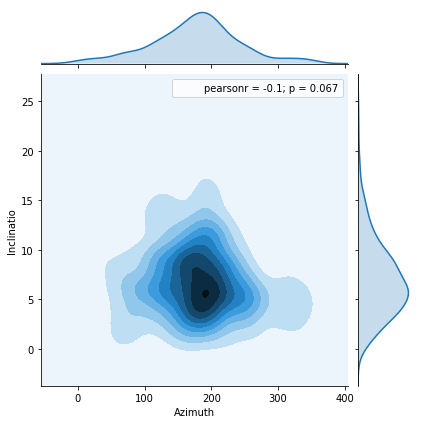

In [213]:
sns.jointplot(x="Azimuth", y="Inclinatio", data=data, kind="kde");

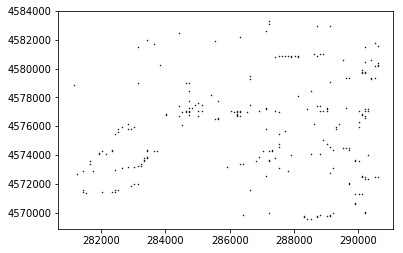

In [268]:
reducer = vd.BlockReduce(reduction=np.mean, spacing=100, center_coordinates=True)
coordinates, azimuth = reducer.filter(coordinates=(data.easting, data.northing), data=data.dipdir
                                       )
plt.plot(*coordinates, ".k", markersize=1)

(4569620, 4583500)

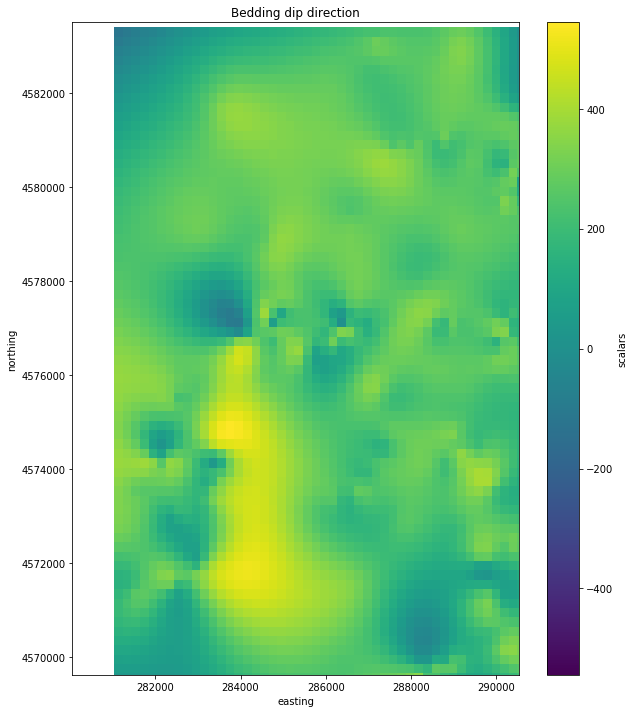

In [269]:
spline = vd.Spline()
spline.fit((coordinates[0], coordinates[1]), azimuth)
grid = spline.grid(spacing=200)
grid.scalars.plot.pcolormesh(cmap="viridis",figsize=(10,12))
plt.title('Bedding dip direction')
plt.xlim(280055, 290525)
plt.ylim(4569620, 4583500)
#plt.savefig('D:\jointazimuth.png')

In [270]:
trend = vd.Trend(degree=3).fit(coordinates, azimuth)
trend_values = trend.predict(coordinates)
residuals = azimuth - trend_values

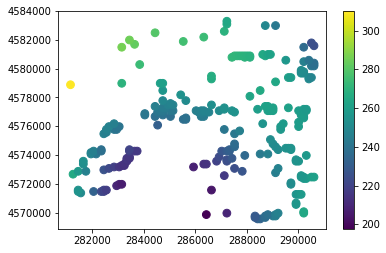

In [271]:
plt.scatter(coordinates[0], coordinates[1], c=trend_values, s=60)
plt.colorbar()

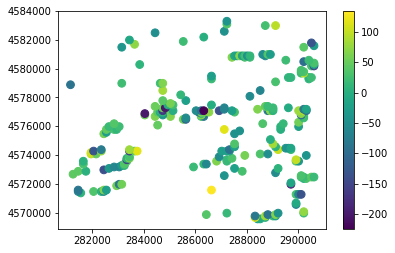

In [272]:
plt.scatter(coordinates[0], coordinates[1], c=residuals, s=60)
plt.colorbar()

(4569620, 4583500)

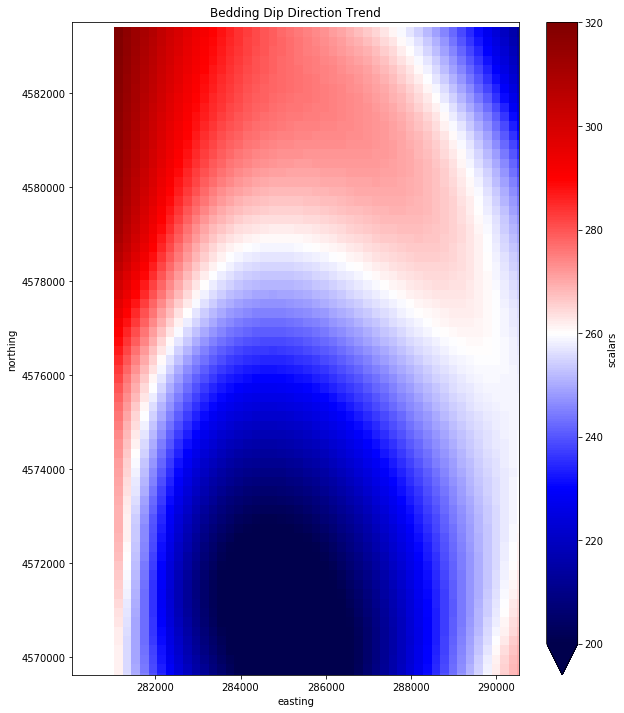

In [274]:
spline = vd.Spline()
spline.fit((coordinates[0], coordinates[1]), trend_values)
grid = spline.grid(spacing=200)
grid.scalars.plot.pcolormesh(cmap="seismic",figsize=(10,12),vmin=200, vmax=320)
plt.title('Bedding Dip Direction Trend')
plt.xlim(280055, 290525)
plt.ylim(4569620, 4583500)
#plt.savefig('D:\jointazimuth.png')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


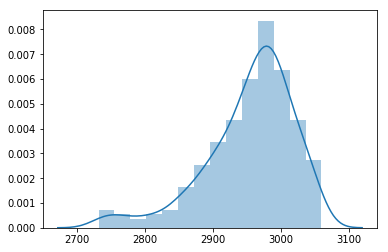

In [260]:
sns.distplot(residuals)